In [48]:
import numpy as np
import tensorflow as tf

# 입력이미지(4차원으로 표현)
# (이미지 개수, width, height, color)
# (1,3,3,1) => (이미지 1개, 가로 3pixel, 세로 3pixel, color수 1)

image = np.array([[[[1],[1],[1]],
                   [[1],[1],[1]],
                   [[1],[1],[1]]]], dtype=np.float32)
print(image.shape)

# filter를 적용
# (filter의 가로길이, 세로길이, 필터의 channel, 필터의 개수)
# (2,2,1,5)
weight = np.array([[[[2,2,2,2,2]],
                    [[2,2,2,2,2]]],
                   [[[2,2,2,2,2]],
                    [[2,2,2,2,2]]]], dtype=np.float32)
print(weight.shape)

# stride : 1
# Padding : VALID => Padding을 사용하지 않겠다
result = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')  # Feature map
print(result.shape)   # (1, 2, 2, 5)
                      # (이미지 1개, 2 by 2 Feature map, Feature map 개수)
sess = tf.Session()
sess.run(result)

(1, 3, 3, 1)
(2, 2, 1, 5)
(1, 2, 2, 5)


array([[[[8., 8., 8., 8., 8.],
         [8., 8., 8., 8., 8.]],

        [[8., 8., 8., 8., 8.],
         [8., 8., 8., 8., 8.]]]], dtype=float32)

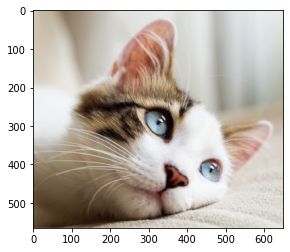

이미지의 크기 : (650, 565)
X : 100, Y : 200의 픽셀값은 : [236 232 229]


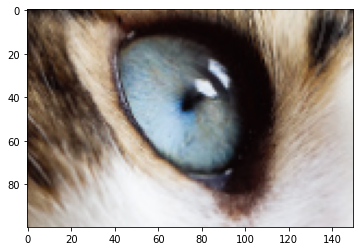

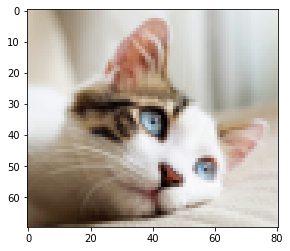

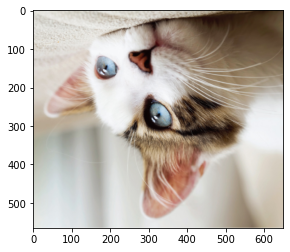

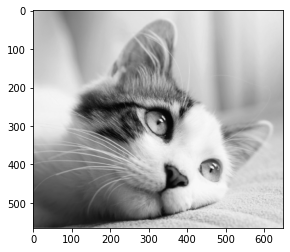

<function matplotlib.pyplot.show(close=None, block=None)>

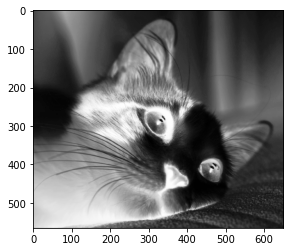

In [42]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('./images/cat.jpg')

plt.imshow(img)
plt.show()

# pixel 데이터를 ndarray로 추출
pixel = np.array(img)

print('이미지의 크기 : {}'.format(img.size))  #  tuple 형태로 image의 size 리턴

# 특정 위치의 pixel 값 추출
# 해당 사진은 650 * 565짜리 사진
# print(pixel.shape) (565, 650, 3)
# pixel의 배열은 (Y값, X값) 순으로 나옴
print('X : {}, Y : {}의 픽셀값은 : {}'.format(100,200,pixel[200,100]))

# pixel에 RGB 배열을 입력해주면 색 수정 가능
# for i in range(50):
#     for j in range(50):
#         pixel[300+i,350+j] = [0, 0, 0]
# plt.imshow(pixel)
# plt.show()

# 이미지 처리 기본
# 1. 이미지 저장
# img.save('./images/file_name.jpg')

# 2. 이미지 crop
crop_image = img.crop((250,250,400,350))  # 좌상(250,250), 우하 좌표(400,350)를 이용
plt.imshow(crop_image)
plt.show()

# 3. resize
resize_img = img.resize((int(img.size[0]/8), int(img.size[1]/8)))
plt.imshow(resize_img)
plt.show()

# 4. 이미지 회전
rotate_img = img.rotate(180)
plt.imshow(rotate_img)
plt.show()

# 5. 흑백 처리
# 각 pixel의 RGB값을 RGB의 평균으로 바꾸면 흑백처리 가능
# ex) (10,20,30) => (20,20,20)
# img.size는 (x,y), pixel 배열은 y값이 선행

grey_pixel = pixel.copy()
for y in range(img.size[1]):
    for x in range(img.size[0]):
        grey_pixel[y][x] = int(np.mean(grey_pixel[y][x]))

plt.imshow(grey_pixel)
plt.show()

plt.imshow(grey_pixel[:,:,0], cmap='Greys')
plt.show

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
ori_img의 shape : (168, 300, 3)
input_img의 shape : (1, 168, 300, 3)
변경된 input_img의 shape : (1, 168, 300, 1)
(3, 3, 1, 1)
결과 데이터의 shape : (1, 166, 298, 1)
(166, 298, 1)


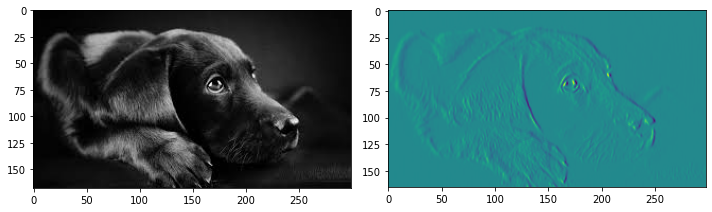

In [19]:
%reset

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

# sub plot 생성
# 첫 plot에서는 원본, 두번째 plot에서는 convolution한 img

fig = plt.figure(figsize=(10,10)) # 가로 10인치, 세로 10인치
ax1 = fig.add_subplot(1,2,1) # (행, 열, 위치)
ax2 = fig.add_subplot(1,2,2)

ori_img = img.imread('./images/dog.jpg')
ax1.imshow(ori_img)
print('ori_img의 shape : {}'.format(ori_img.shape))

# convolution 연산을 수행하기 위해서는 4차원 필요
# 이미지(3차원) + 이런 이미지가 여러장 => 4차원
# (이미지 개수, height, width, color) 형식으로 convolution 입력형태를 맞춤

input_img = ori_img.reshape((1,) + ori_img.shape)
print('input_img의 shape : {}'.format(input_img.shape))

# 입력이미지의 color 수를 변경 -> channel을 1로 변경
input_img = input_img[:,:,:,:1]
print('변경된 input_img의 shape : {}'.format(input_img.shape))

# filter : (filter height, filter weight, filter channel, filter 개수)
# filter는 정방향
# filter는 정방향 중에서 3x3을 많이 사용
# (3,3,1,1)
weight = np.array([[[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]]])
print(weight.shape)

# 해당 이미지의 데이터 타입이 unit8이어서 conv2d()에 입력 불가
# input_img type을 np.float32로 변환
input_img = input_img.astype(np.float32)

sess = tf.Session()
conv2d = tf.nn.conv2d(input_img, weight, strides=[1,1,1,1], padding='VALID')
result = sess.run(conv2d)
print('결과 데이터의 shape : {}'.format(result.shape))

t_img = result[0,:,:,:]
print(t_img.shape)
ax2.imshow(t_img)

fig.tight_layout()
plt.show()

In [24]:
# Pooling 처리
# Pooling은 데이터 크기를 줄이는 작업

import numpy as np
import tensorflow as tf

# 입력이미지
# (1,4,4,1) => (이미지 개수, height, width, channel)
image = np.array([[[[1],[1],[1],[1]],
                   [[1],[1],[1],[1]],
                   [[1],[1],[1],[1]],
                   [[1],[1],[1],[1]]]])
print(image.shape)

# Pooling
# Pooling에는 max pooling, avg pooling, min pooling 존재
# 일반적으로 max pooling 사용 => 특징을 뽑기 적합
pool = tf.nn.max_pool(image, ksize=[1,2,2,1],
                      strides=[1,2,2,1],         # 실제 kernel 사이즈는 (2,2), strides는 2 양 옆의 1은 dummy 
                      padding='VALID')           # padding을 SAME으로 줄 경우, 데이터의 특징 강조

sess = tf.Session()
result = sess.run(pool)
print(result.shape)

(1, 4, 4, 1)
(1, 2, 2, 1)


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
ori_img의 shape : (168, 300, 3)
input_img의 shape : (1, 168, 300, 3)
변경된 input_img의 shape : (1, 168, 300, 1)
(3, 3, 1, 1)
결과 데이터의 shape : (1, 166, 298, 1)
(166, 298, 1)
(83, 149, 1)


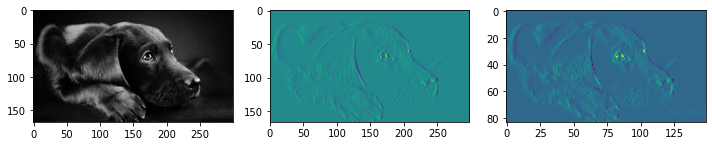

In [29]:
%reset

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

# sub plot 생성
# 첫 plot에서는 원본, 두번째 plot에서는 convolution한 img

fig = plt.figure(figsize=(10,10)) # 가로 10인치, 세로 10인치
ax1 = fig.add_subplot(1,3,1) # (행, 열, 위치)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ori_img = img.imread('./images/dog.jpg')
ax1.imshow(ori_img)
print('ori_img의 shape : {}'.format(ori_img.shape))

# convolution 연산을 수행하기 위해서는 4차원 필요
# 이미지(3차원) + 이런 이미지가 여러장 => 4차원
# (이미지 개수, height, width, color) 형식으로 convolution 입력형태를 맞춤

input_img = ori_img.reshape((1,) + ori_img.shape)
print('input_img의 shape : {}'.format(input_img.shape))

# 입력이미지의 color 수를 변경 -> channel을 1로 변경
input_img = input_img[:,:,:,:1]
print('변경된 input_img의 shape : {}'.format(input_img.shape))

# filter : (filter height, filter weight, filter channel, filter 개수)
# filter는 정방향
# filter는 정방향 중에서 3x3을 많이 사용
# (3,3,1,1)
weight = np.array([[[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]]])
print(weight.shape)

# 해당 이미지의 데이터 타입이 unit8이어서 conv2d()에 입력 불가
# input_img type을 np.float32로 변환
input_img = input_img.astype(np.float32)

sess = tf.Session()
conv2d = tf.nn.conv2d(input_img, weight, strides=[1,1,1,1], padding='VALID')
result = sess.run(conv2d)
print('결과 데이터의 shape : {}'.format(result.shape))

t_img = result[0,:,:,:]
print(t_img.shape)
ax2.imshow(t_img)

pool = tf.nn.max_pool(result, ksize=[1,2,2,1],
                      strides=[1,2,2,1],         # 실제 kernel 사이즈는 (2,2), strides는 2 양 옆의 1은 dummy 
                      padding='VALID')           # padding을 SAME으로 줄 경우, 데이터의 특징 강조

sess = tf.Session()
pooled_img = sess.run(pool)
pooled_img = pooled_img[0,:,:,:]
print(pooled_img.shape)
ax3.imshow(pooled_img)

fig.tight_layout()
plt.show()